In [2]:
# Code generating visuals and numbers for data exploration
import json
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [3]:
## 200Hz data is used for explorations because at this stage we know little about the dataset

path200 = '../data/interim/combined/dataByName50hz.json'
with open(path200, 'r') as jsonFile200:
    data200 = json.load(jsonFile200)
    jsonFile200.close()
    
dfs200 = {}
for key in data200:
    dfs200[key] = pd.DataFrame.from_dict(data200[key])
    dfs200[key]['timestamp'] = pd.to_datetime(dfs200[key]['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True)

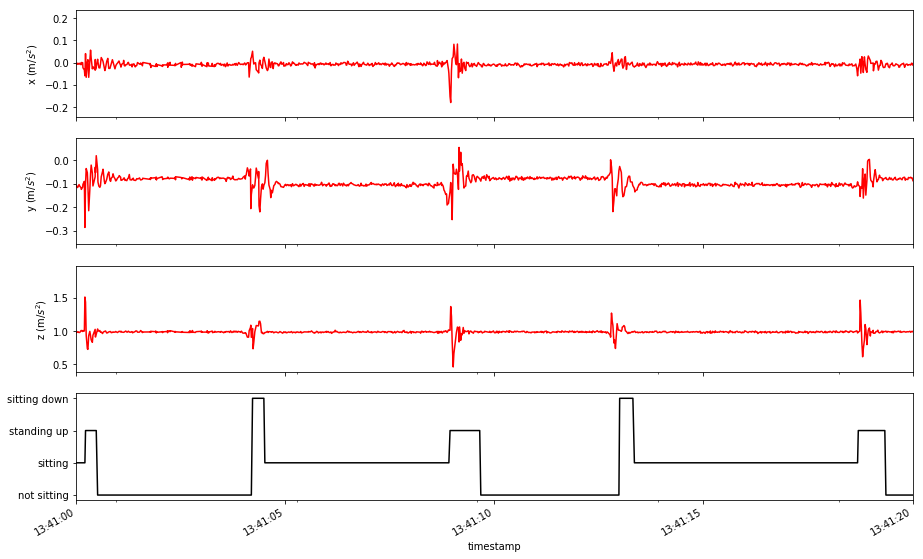

In [85]:
## Plot the x, y, z and state values for a single subject
## This visualistions not only show behaviourial patterns for different activities
## but also the frequenies of each activity

# ax = dfs200['sue'].plot(y=['x', 'y', 'z', 'state'], figsize=(10,10), subplots=True, layout=(2,2))
# dfs200['sue'].plot(x='timestamp', y='state', ax=ax, subplots=True)
start = pd.to_datetime('2019-03-27 13:41:00.00', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('20 sec'))



ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z', 'state'], figsize=(15,10), xlim=xlim, subplots=True, layout=(4,1), legend=False, color=['red', 'red', 'red', 'black'])
ax[0][0].set_ylabel('x (m/$s^2$)')
ax[1][0].set_ylabel('y (m/$s^2$)')
ax[2][0].set_ylabel('z (m/$s^2$)')
plt.yticks([0,1,2,3],['not sitting', 'sitting', 'standing up', 'sitting down'], axes=ax[3][0])

fig = ax[0][0].get_figure()
fig.savefig('zoom_traces.png', bbox_inches = 'tight', pad_inches = 0.2)

In [4]:
print(list(data200))

['bojan', 'daniel', 'dilhan', 'saeid', 'miguel', 'laura', 'jacob', 'sue', 'lenin']


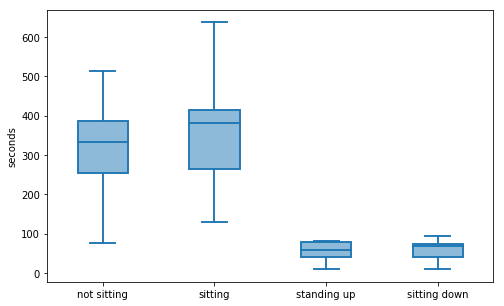

In [4]:
## Boxplot shows the total duration in seconds for each activity
## and their distribution across subjects.
## The duration per subject isn't shown since the goal isn't to discriminate subjects
## rather, it is to discriminate between activities

def group_by_activity(subjects, activities):
    grouped = [{a:[e['state'] for e in subjects[s] if e['state']==a] for a in activities} for s in subjects]
    return grouped

def plot_durations(grouped, activities):
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    colors = [[1,0,0,0.5],
              [0,0,1,0.5],
              [0,1,0,0.5],
              [0,0,1,0.5]]

    labels = ['not sitting', 'sitting', 'standing up', 'sitting down']
    
    freq = 50
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    
    plt.figure(figsize=(8,5))
    bp = plt.boxplot(durations, labels=labels, patch_artist=True)
    
    edge_color = 'blue'
    fill_color = 'cyan'
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='#1f77b4', linewidth=1.9)
#         plt.setp(bp[element], linewidth=2)
#         if element == 'whiskers':
#             plt.setp(bp[element], linewidth=2)
#         plt.setp(bp['whiskers'][0], linewidth=3)
        
    for patch in bp['boxes']:
        patch.set(facecolor='#8ebad9')
        
    plt.ylabel("seconds")
    plt.savefig('box.png', bbox_inches = 'tight', pad_inches = 0.2)
    plt.show()
    
activities = [i for i in range(0,4)]
grouped = group_by_activity(data200, activities)
plot_durations(grouped, activities)

In [ ]:
## Visualising trace data for each subject. We are interested in:
## 1) scale of traces and amplitudes per and across subjects (for normalising data)
## 2) patterns in the trace data across subjects (correlation between x, y and z)
## 3) a single transitional duration across subjects (for picking window size)

# def load_dataset(prefix=''):
#     subjects = list()
#     directory = prefix + 'HAR/'
#     for name in listdir(directory):
#         filename = directory + '/' + name
#         if not filename.endswith('.csv'):
#             continue
#         df = read_csv(filename, header=None)
#         # drop row number
#         values = df.values[:, 1:]
#         subjects.append(values)
#     return subjects

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    fig = plt.figure(figsize=(13.5,22.5))
    names = list(subjects)
    # create a plot for each subject
    for i in range(len(subjects)):
        ax = plt.subplot(len(subjects), 1, i+1)
        ax.set_title(names[i])
        fig.subplots_adjust(hspace=0.5)

        # plot each of x, y and z
        for j in ['x','y','z']:
            color = '#2ca02c'
            if j == 'y':
                color = '#ff7f0e'
            elif j == 'z':
                color = '#1f77b4'
            plt.grid(True)
            plt.ylim(-1, 2.2)
            plt.ylabel('m/$s^2$')
            plt.plot(subjects[names[i]][j], color=color)
    plt.xlabel('nr. of samples')
    plt.savefig('traces.png', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

print('Loaded %d subjects' % len(dfs200))
print(len(dfs200))
# plot trace data for each subject
plot_subjects(dfs200)

Loaded 9 subjects


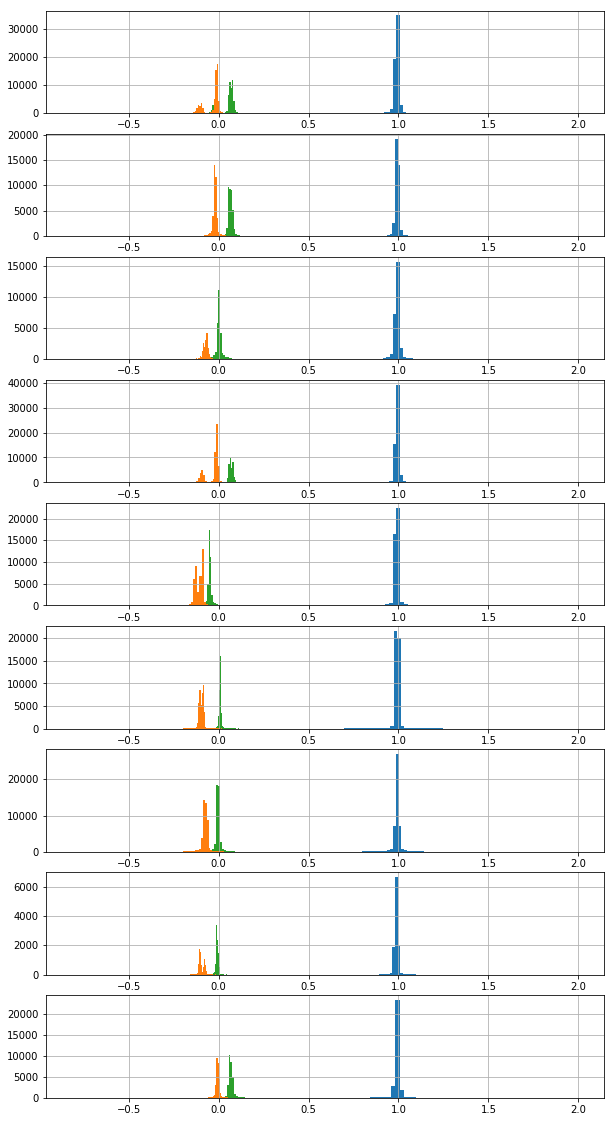

In [7]:
## Plotting the histograms of the traces per subject
## Helps with recognising their distributions and thus with outlier detection
## Shows the spread of the traces and will help with normalising the traces necessary for cross subject modeling
## This plot help to show both the relationship between the distributions within a subject and differences in the distributions between subjects
## Perhaps plot histograms per activity?

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    plt.figure(figsize=(10,20))
    names = list(subjects)
    # create a plot for each subject
    xaxis = None
    for i in range(len(subjects)):
        ax = plt.subplot(len(subjects), 1, i+1, sharex=xaxis)
        if i == 0:
            xaxis = ax
        # plot a histogram of x data
        for j in ['x','y','z']:
            color = '#2ca02c'
            if j == 'y':
                color = '#ff7f0e'
            elif j == 'z':
                color = '#1f77b4'
            plt.grid(True)
#             plt.xlim(-0.25, 1.25)
#             plt.ylim(0, 2000)
            plt.hist(subjects[names[i]][j], bins=100, color=color)
#     plt.savefig('hist.png')
    plt.show()

print('Loaded %d subjects' % len(dfs200))
# plot trace data for each subject
plot_subjects(dfs200)

In [22]:
# Summary statistics per variable
var = {'x':[], 'y':[], 'z':[]}

for subject in dfs200:
    for index, row in dfs200[subject].iterrows():
        var['x'].append(row['x'])
        var['y'].append(row['y'])
        var['z'].append(row['z'])

In [30]:
print(pd.DataFrame(var['x']).describe())
print(pd.DataFrame(var['y']).describe())
print(pd.DataFrame(var['z']).describe())

                   0
count  360882.000000
mean        0.023876
std         0.047402
min        -0.517578
25%        -0.008789
50%         0.011719
75%         0.066406
max         0.713867
                   0
count  360882.000000
mean       -0.056045
std         0.045953
min        -0.820312
25%        -0.091797
50%        -0.065430
75%        -0.011719
max         0.510742
                   0
count  360882.000000
mean        0.992109
std         0.037506
min        -0.311523
25%         0.986328
50%         0.992188
75%         0.998047
max         2.000000


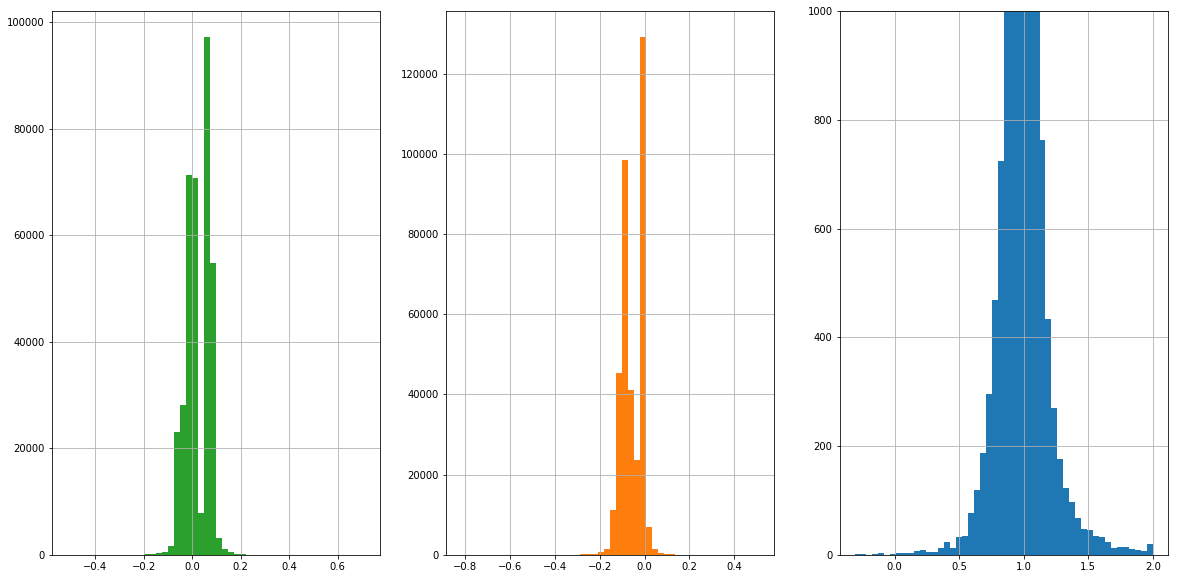

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

cnt = 0
for i in ['x', 'y', 'z']:
    ax = axes[cnt]
    
    color = '#2ca02c'
    if i == 'y':
        color = '#ff7f0e'
    elif i == 'z':
        color = '#1f77b4'
    ax.grid(True)
    ax.hist(var[i], bins=50, color=color)
    plt.ylim(0,1000)
    
    cnt += 1
plt.show()

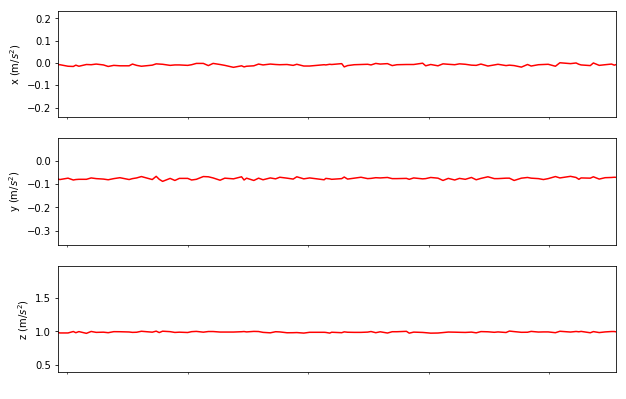

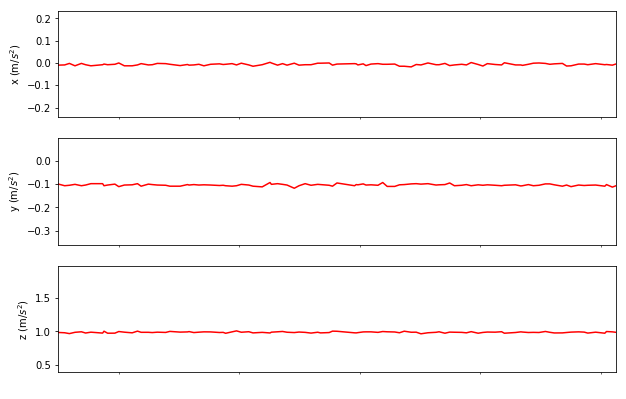

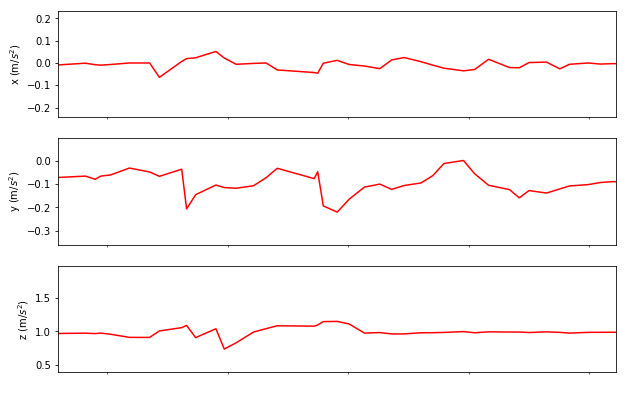

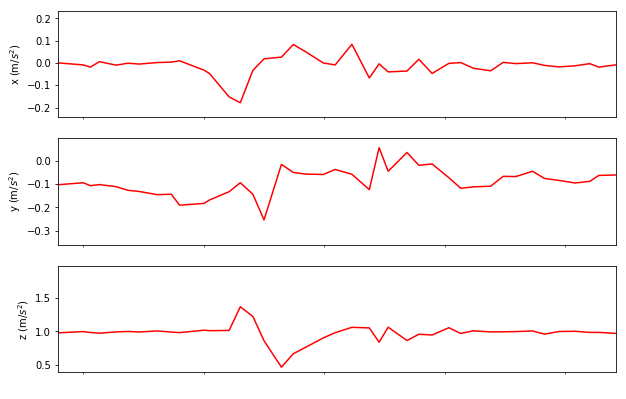

In [410]:
# Create plots of close-up of each activity class for 1 subject

# Not sitting
start = pd.to_datetime('2019-03-27 13:41:10.00', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('2 sec'))

ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z'], figsize=(10,10), xlim=xlim, subplots=True, layout=(4,1), legend=False, color="r")
# ax[0][0].set_facecolor('grey')
# ax[0][0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0][0].set_xticks([],[])
ax[2][0].set_xlabel(' ')
ax[0][0].set_ylabel('x (m/$s^2$)')
ax[1][0].set_ylabel('y (m/$s^2$)')
ax[2][0].set_ylabel('z (m/$s^2$)')

fig = ax[0][0].get_figure()
fig.savefig('trace_notsitting.png', bbox_inches = 'tight', pad_inches = 0)

# Sitting
start = pd.to_datetime('2019-03-27 13:41:15.00', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('2 sec'))

ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z'], figsize=(10,10), xlim=xlim, subplots=True, layout=(4,1), legend=False, color="r")
# ax[0][0].set_facecolor('grey')
ax[0][0].set_xticks([],[])
ax[2][0].set_xlabel(' ')
ax[0][0].set_ylabel('x (m/$s^2$)')
ax[1][0].set_ylabel('y (m/$s^2$)')
ax[2][0].set_ylabel('z (m/$s^2$)')
fig = ax[0][0].get_figure()
fig.savefig('trace_sitting.png', bbox_inches = 'tight', pad_inches = 0)

# Sitting down
start = pd.to_datetime('2019-03-27 13:41:04.00', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('0.8 sec'))

ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z'], figsize=(10,10), xlim=xlim, subplots=True, layout=(4,1), legend=False, color="r")
# ax[0][0].set_facecolor('grey')
ax[0][0].set_xticks([],[])
ax[2][0].set_xlabel(' ')
ax[0][0].set_ylabel('x (m/$s^2$)')
ax[1][0].set_ylabel('y (m/$s^2$)')
ax[2][0].set_ylabel('z (m/$s^2$)')
fig = ax[0][0].get_figure()
fig.savefig('trace_sittingdown.png', bbox_inches = 'tight', pad_inches = 0)

# Standing up
start = pd.to_datetime('2019-03-27 13:41:08.70', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('0.8 sec'))

ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z'], figsize=(10,10), xlim=xlim, subplots=True, layout=(4,1), legend=False, color="r")
# ax[0][0].set_facecolor('grey')
ax[0][0].set_xticks([],[])
ax[2][0].set_xlabel(' ')
ax[0][0].set_ylabel('x (m/$s^2$)')
ax[1][0].set_ylabel('y (m/$s^2$)')
ax[2][0].set_ylabel('z (m/$s^2$)')
fig = ax[0][0].get_figure()
fig.savefig('trace_standingup.png', bbox_inches = 'tight', pad_inches = 0)

In [70]:
# Separating variables per activity class
act = {0: {'x': [], 'y': [], 'z': []},
       1: {'x': [], 'y': [], 'z': []},
       2: {'x': [], 'y': [], 'z': []},
       3: {'x': [], 'y': [], 'z': []}}

for subject in dfs200:
    for index, row in dfs200[subject].iterrows():
        act[row['state']]['x'].append(row['x'])
        act[row['state']]['y'].append(row['y'])
        act[row['state']]['z'].append(row['z'])

144928


In [72]:
# Summary statistics per activity class 0
print(pd.DataFrame(act[0]['x']).describe())
print(pd.DataFrame(act[0]['y']).describe())
print(pd.DataFrame(act[0]['z']).describe())

# Summary statistics per activity class 1
print(pd.DataFrame(act[1]['x']).describe())
print(pd.DataFrame(act[1]['y']).describe())
print(pd.DataFrame(act[1]['z']).describe())

# Summary statistics per activity class 2
print(pd.DataFrame(act[2]['x']).describe())
print(pd.DataFrame(act[2]['y']).describe())
print(pd.DataFrame(act[2]['z']).describe())

# Summary statistics per activity class 3
print(pd.DataFrame(act[3]['x']).describe())
print(pd.DataFrame(act[3]['y']).describe())
print(pd.DataFrame(act[3]['z']).describe())

                   0
count  144928.000000
mean        0.019016
std         0.042039
min        -0.503906
25%        -0.009766
50%         0.011719
75%         0.059570
max         0.330078
                   0
count  144928.000000
mean       -0.051118
std         0.036374
min        -0.820312
25%        -0.085938
50%        -0.063477
75%        -0.014648
max         0.176758
                   0
count  144928.000000
mean        0.992570
std         0.017591
min        -0.265625
25%         0.987305
50%         0.993164
75%         0.999023
max         1.642578
                   0
count  165033.000000
mean        0.028084
std         0.048085
min        -0.517578
25%        -0.005859
50%         0.011719
75%         0.075195
max         0.406250
                   0
count  165033.000000
mean       -0.059672
std         0.048955
min        -0.697266
25%        -0.103516
50%        -0.076172
75%        -0.009766
max         0.200195
                   0
count  165033.000000
mean        0

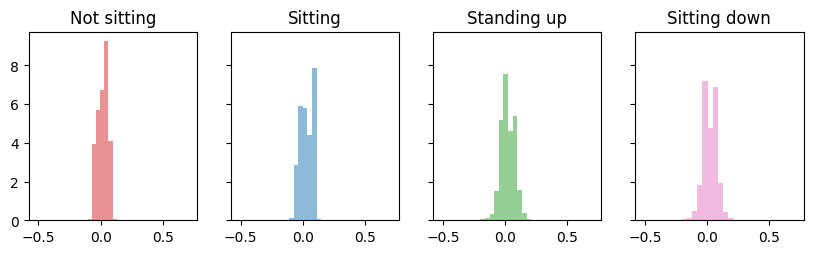

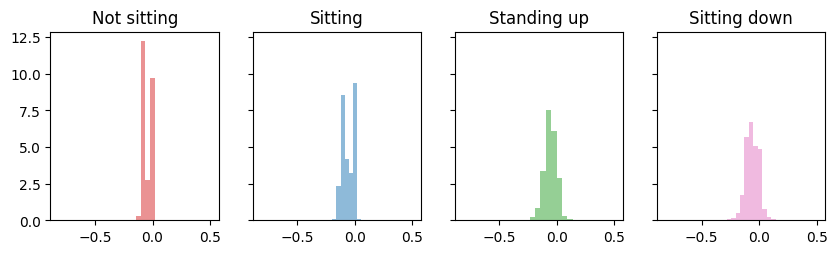

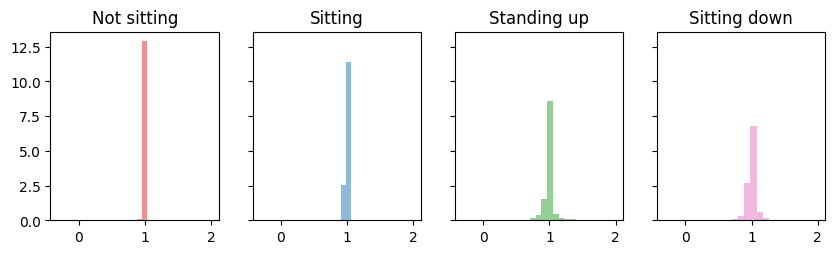

In [226]:
from matplotlib.ticker import PercentFormatter
import numpy as np

# Plot histogram to show distribution of each variable per activity
# Histograms of the same variables are shown in the same plot

# Histograms for variable x
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5), sharex=True, sharey=True, dpi=100)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']
labels = ['Not sitting', 'Sitting', 'Standing up', 'Sitting down']

for i in [0,1,2,3]:
    axes[i].hist(act[i]['x'], bins=25, density=True, label=labels[i], alpha=0.5, color=colors[i])
    axes[i].set_title(labels[i])
#     axes[i].set_ylim(0,1)
#     axes[i].hist(act[i]['x'], bins=25, density=True, label='sitting', alpha=0.5)
#     axes[i].hist(act[i]['x'], bins=50, density=True, label='standing up', alpha=0.5)
#     axes[i].hist(act[i]['x'], bins=50, density=True, label='sitting down', alpha=0.5)
# plt.ylim(0,4)
fig = axes[0].get_figure()
fig.savefig('hist_x.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Histograms for variable y
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5), sharex=True, sharey=True, dpi=100)

for i in [0,1,2,3]:
    axes[i].hist(act[i]['y'], bins=25, density=True, stacked=True, label=labels[i], alpha=0.5, color=colors[i])
    axes[i].set_title(labels[i])
fig = axes[0].get_figure()
fig.savefig('hist_y.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Histograms for variable z
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5), sharex=True, sharey=True, dpi=100)

for i in [0,1,2,3]:
    axes[i].hist(act[i]['z'], bins=25, density=True, label=labels[i], alpha=0.5, color=colors[i])
    axes[i].set_title(labels[i])
fig = axes[0].get_figure()
fig.savefig('hist_z.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

Group 0 : bojan


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


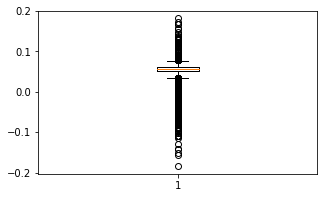

0

In [19]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np
from os import listdir
from os import path
import re
import csv
from sklearn.model_selection import LeaveOneGroupOut

source = '../data/processed/'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def run_logo(X_all, y_all, groups):
    logo = LeaveOneGroupOut()
    group = 0

    for train_index, test_index in logo.split(X_all, groups=groups):
        if group != 0:
            group += 1
            continue
        print('Group', group, ':', groups.values[test_index][0])
        group += 1
        
        train = []
        test = []
        
        i = 0
        for v in ['x','y','z']:
            if v != 'x':
                continue
            plt.figure(figsize=(5,3))

            test = list()
            train = list()
            
            for j in [0,1,2,3]:
#                 print(X_all.loc[test_index][X_all.state == j][v+'0'])
                test.append(X_all.loc[test_index][X_all.state == j][v+'0'])
                train.append(X_all.loc[train_index][X_all.state == j][v+'0'])
            
                if j == 0:
                    plt.boxplot(X_all.loc[test_index][X_all.state == j][v+'0'])
#                     print(X_all.loc[test_index][X_all.state == j])
#                     print('min', X_all.loc[test_index][X_all.state == j]['x0'].describe())
#             test_y = X_all.loc[test_index][X_all.state == c]['y0']
#             train_y = X_all.loc[train_index][X_all.state == c]['y0']
            
#             test_z = X_all.loc[test_index][X_all.state == c]['z0']
#             train_z = X_all.loc[train_index][X_all.state == c]['z0']
            
#             bpl = plt.boxplot(test, positions=np.array(range(len(test)))*2.0-0.4, sym='', widths=0.6)
#             bpr = plt.boxplot(train, positions=np.array(range(len(train)))*2.0+0.4, sym='', widths=0.6)
#             set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
#             set_box_color(bpr, '#2C7BB6')
            
#             plt.plot([], c='#D7191C', label='test')
#             plt.plot([], c='#2C7BB6', label='train')
#             plt.legend()

#             ticks = ['not sitting','sitting','standing up','sitting down']
#             plt.title('Z')
#             plt.ylabel('m/$s^2$')
#             plt.xticks(range(0, len(ticks) * 2, 2), ticks, rotation=45)
#             plt.xlim(-1.5, len(ticks)*1.9)
#             plt.ylim(-0.26, 0.21)
#             plt.tight_layout()
#             plt.savefig('cv_sue_z.png', bbox_inches = 'tight', pad_inches = 0)
            plt.show()
            break
        
        break
    return 0

filename = source + '/' + 'train' + '.csv'
    
train_df = pd.read_csv(filename)
X_train = train_df.drop(['name'], axis=1)
y_train = pd.DataFrame(train_df['state'])
groups = train_df['name']

run_logo(X_train, y_train, groups)

In [314]:
subjects = ['bojan', 'daniel', 'dilhan', 'jacob', 'laura', 'lenin', 'miguel', 'saeid', 'sue']

for s in subjects:
    test = train_df.loc[train_df['name'] == s].drop(['name'], axis=1)
    sitting_test = 

              x0        y0        z0  state
113347 -0.027344 -0.118164  0.996094      1
113348 -0.031250 -0.115234  1.002930      1
113349 -0.038086 -0.112305  0.995117      1
113350 -0.029297 -0.115234  0.995117      1
113351 -0.023438 -0.115234  0.985352      1
113352 -0.029297 -0.116211  0.970703      1
113353 -0.033203 -0.120117  0.991211      1
113354 -0.032227 -0.108398  0.984375      1
113355 -0.030273 -0.107422  0.982422      1
113356 -0.035156 -0.115234  0.998047      1
113357 -0.032227 -0.117188  1.004883      1
113358 -0.033203 -0.121094  0.981445      1
113359 -0.031250 -0.115234  0.994141      1
113360 -0.032227 -0.116211  0.983398      1
113361 -0.035156 -0.125977  0.990234      1
113362 -0.017578 -0.109375  0.979492      1
113363 -0.024414 -0.119141  0.981445      1
113364 -0.026367 -0.118164  0.986328      1
113365 -0.024414 -0.117188  0.994141      1
113366 -0.026367 -0.109375  0.980469      1
113367 -0.020508 -0.116211  0.986328      1
113368 -0.027344 -0.120117  0.99

In [352]:
np.random.rand(1, 10)

array([[0.95817448, 0.5595225 , 0.52351262, 0.83067042, 0.93130681,
        0.66024217, 0.48471281, 0.45522428, 0.4645053 , 0.52938495]])

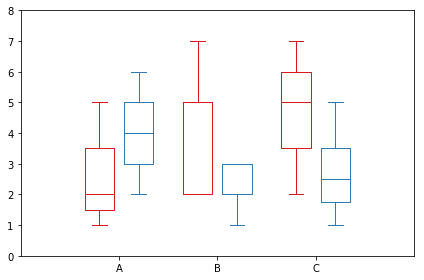

In [361]:
data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

ticks = ['A', 'B', 'C']
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

In [362]:
np.median([5,7,2,2,5])

5.0